In [22]:
import pandas as pd
import glob
import os
# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import json
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 18})

In [2]:
xcopa_langs = ["en", "ht", "ta"]
xnli_langs = ["en","sw", "ur"]
model = "gpt-35-tunro"

In [3]:
langcode2lang = {
    "en": "English",
    "ht": "Haitian Creole",
    "ta": "Tamil",
    "sw": "Swahili",
    "ur": "Urdu"
}

In [4]:
def match_pred_nd_label(pred, label):
    pred = pred.lower()
    label = label.lower()
    if label == "choice1":
        match = float(("choice1" in pred) or ("choice 1" in pred))
    elif label == "choice2":
        match = float(("choice2" in pred) or ("choice 2" in pred))
    else:
        match = float(label in pred)
        
    return match

dataset_langs_dict = {
    "xcopa": xcopa_langs,
    "xnli": xnli_langs
}

datasets = []
langs = []
few_shots = []
accs = []

for dataset, dataset_langs in dataset_langs_dict.items():
    for lang in dataset_langs:
        results_dirs = glob.glob(f"../results/{dataset}/{model}/{lang}/*")
        for result_dir in results_dirs:
            try:
                with open(f"{result_dir}/results.json") as f:
                    results = json.load(f)
            except FileNotFoundError:
                continue

            preds_df = pd.read_csv(f"{result_dir}/preds.csv")

            preds_df["Match Corrected"] = preds_df.apply(
                lambda x: match_pred_nd_label( x["Prediction"], x["Label"]), axis = 1
            )
            corrected_acc = preds_df["Match Corrected"].mean()
            recored_acc = results["metrics"]["accuracy"]
            print(f"Recorded Accuracy: {recored_acc}")
            print(f"Corrected Accuracy: {corrected_acc}")
            if corrected_acc < recored_acc:
                raise ValueError(f"Corrected Accuracy cannot be less than recorded accuracy ({corrected_acc} < {recored_acc})")

            few_shots.append(results["few_shot_k"])
            accs.append(corrected_acc)
            datasets.append(dataset.upper())
            langs.append(langcode2lang[lang])

Recorded Accuracy: 0.976
Corrected Accuracy: 0.978
Recorded Accuracy: 0.014
Corrected Accuracy: 0.84
Recorded Accuracy: 0.954
Corrected Accuracy: 0.97
Recorded Accuracy: 0.984
Corrected Accuracy: 0.984
Recorded Accuracy: 0.982
Corrected Accuracy: 0.982
Recorded Accuracy: 0.97
Corrected Accuracy: 0.97
Recorded Accuracy: 0.006
Corrected Accuracy: 0.62
Recorded Accuracy: 0.756
Corrected Accuracy: 0.758
Recorded Accuracy: 0.71
Corrected Accuracy: 0.71
Recorded Accuracy: 0.712
Corrected Accuracy: 0.722
Recorded Accuracy: 0.722
Corrected Accuracy: 0.728
Recorded Accuracy: 0.672
Corrected Accuracy: 0.684
Recorded Accuracy: 0.602
Corrected Accuracy: 0.602
Recorded Accuracy: 0.008
Corrected Accuracy: 0.542
Recorded Accuracy: 0.588
Corrected Accuracy: 0.588
Recorded Accuracy: 0.558
Corrected Accuracy: 0.564
Recorded Accuracy: 0.6
Corrected Accuracy: 0.602
Recorded Accuracy: 0.562
Corrected Accuracy: 0.562
Recorded Accuracy: 0.7191616766467066
Corrected Accuracy: 0.7261477045908183
Recorded Accur

In [5]:
dataset_langs

['en', 'sw', 'ur']

In [6]:
fs_acc_df = pd.DataFrame({
    "Dataset": datasets,
    "Language": langs,
    "k": few_shots,
    "Accuracy": accs
})
fs_acc_df = fs_acc_df.sort_values(by = ["Dataset", "Language", "k"])
fs_acc_df

,Dataset,Language,k,Accuracy
1,XCOPA,English,0,0.840000
2,XCOPA,English,1,0.970000
5,XCOPA,English,2,0.970000
0,XCOPA,English,4,0.978000
4,XCOPA,English,8,0.982000
3,XCOPA,English,16,0.984000
6,XCOPA,Haitian Creole,0,0.620000
11,XCOPA,Haitian Creole,1,0.684000
9,XCOPA,Haitian Creole,2,0.722000
8,XCOPA,Haitian Creole,4,0.710000


In [7]:
save_dir = "../analysis/results/in-context-learning/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
fs_acc_df.to_csv(f"{save_dir}/few_shot_v_acc.csv")

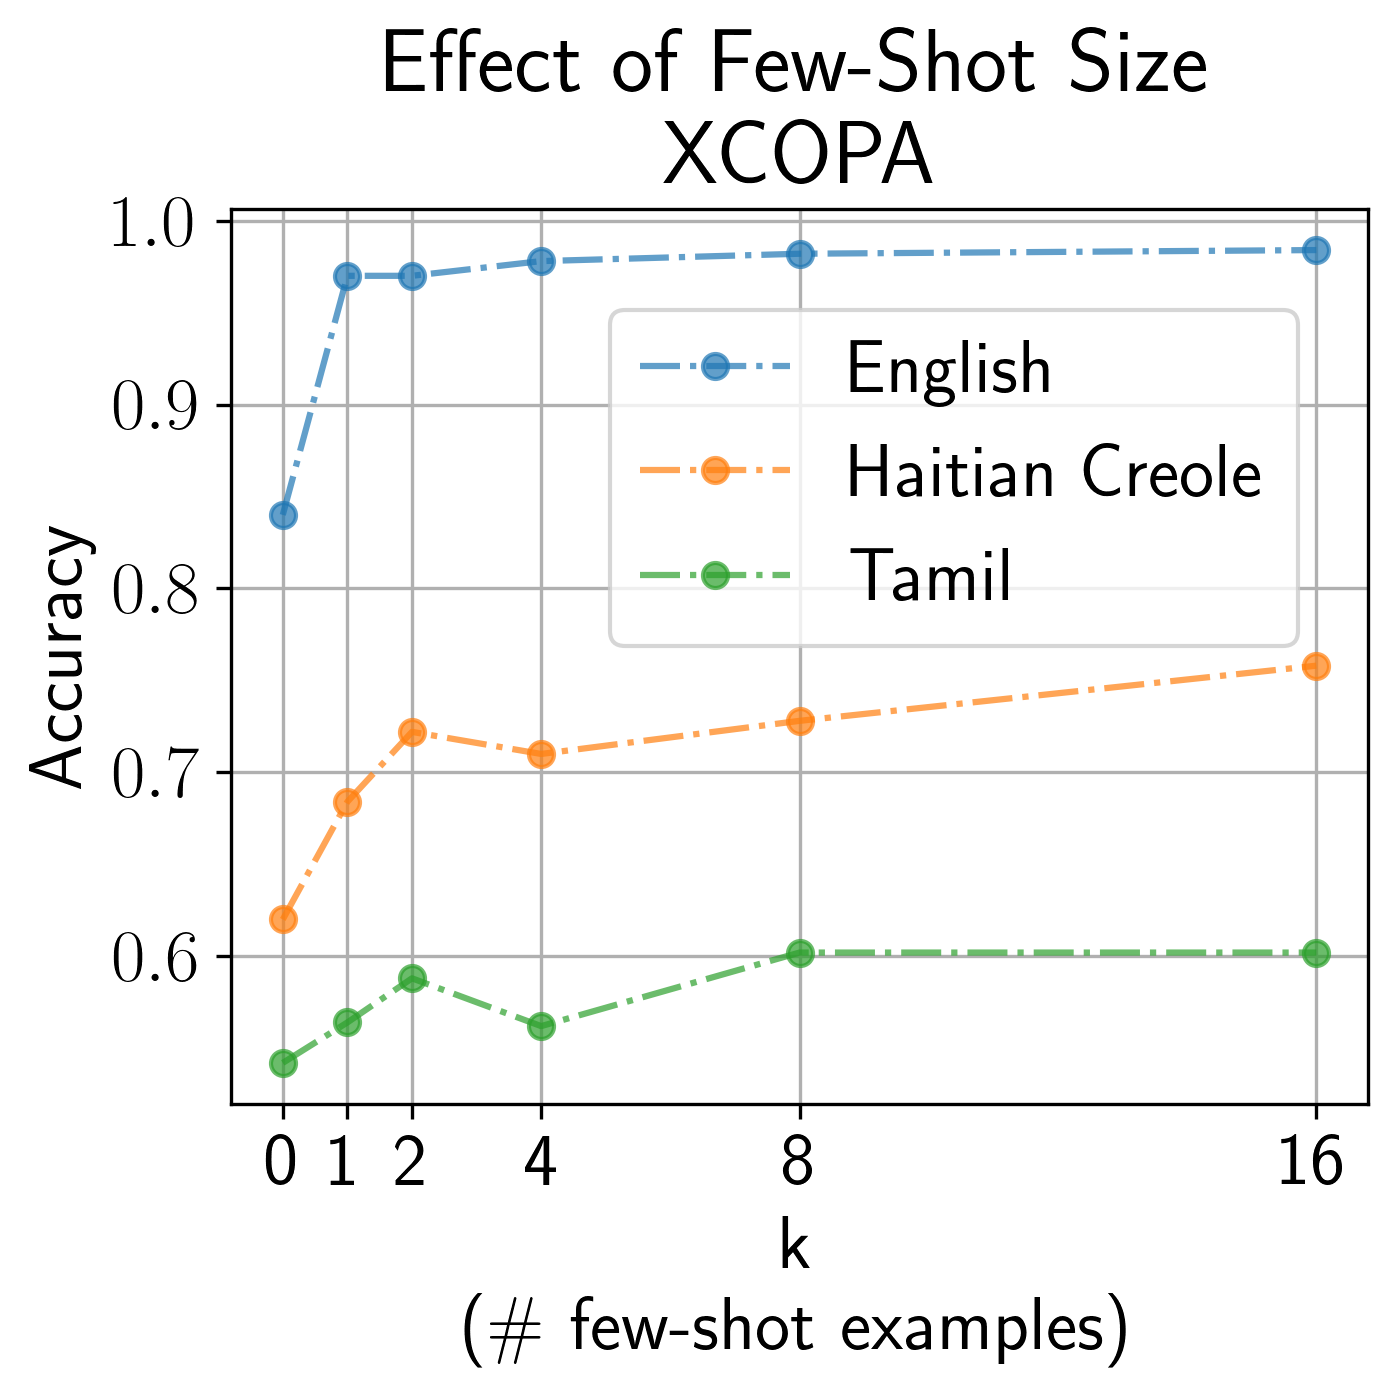

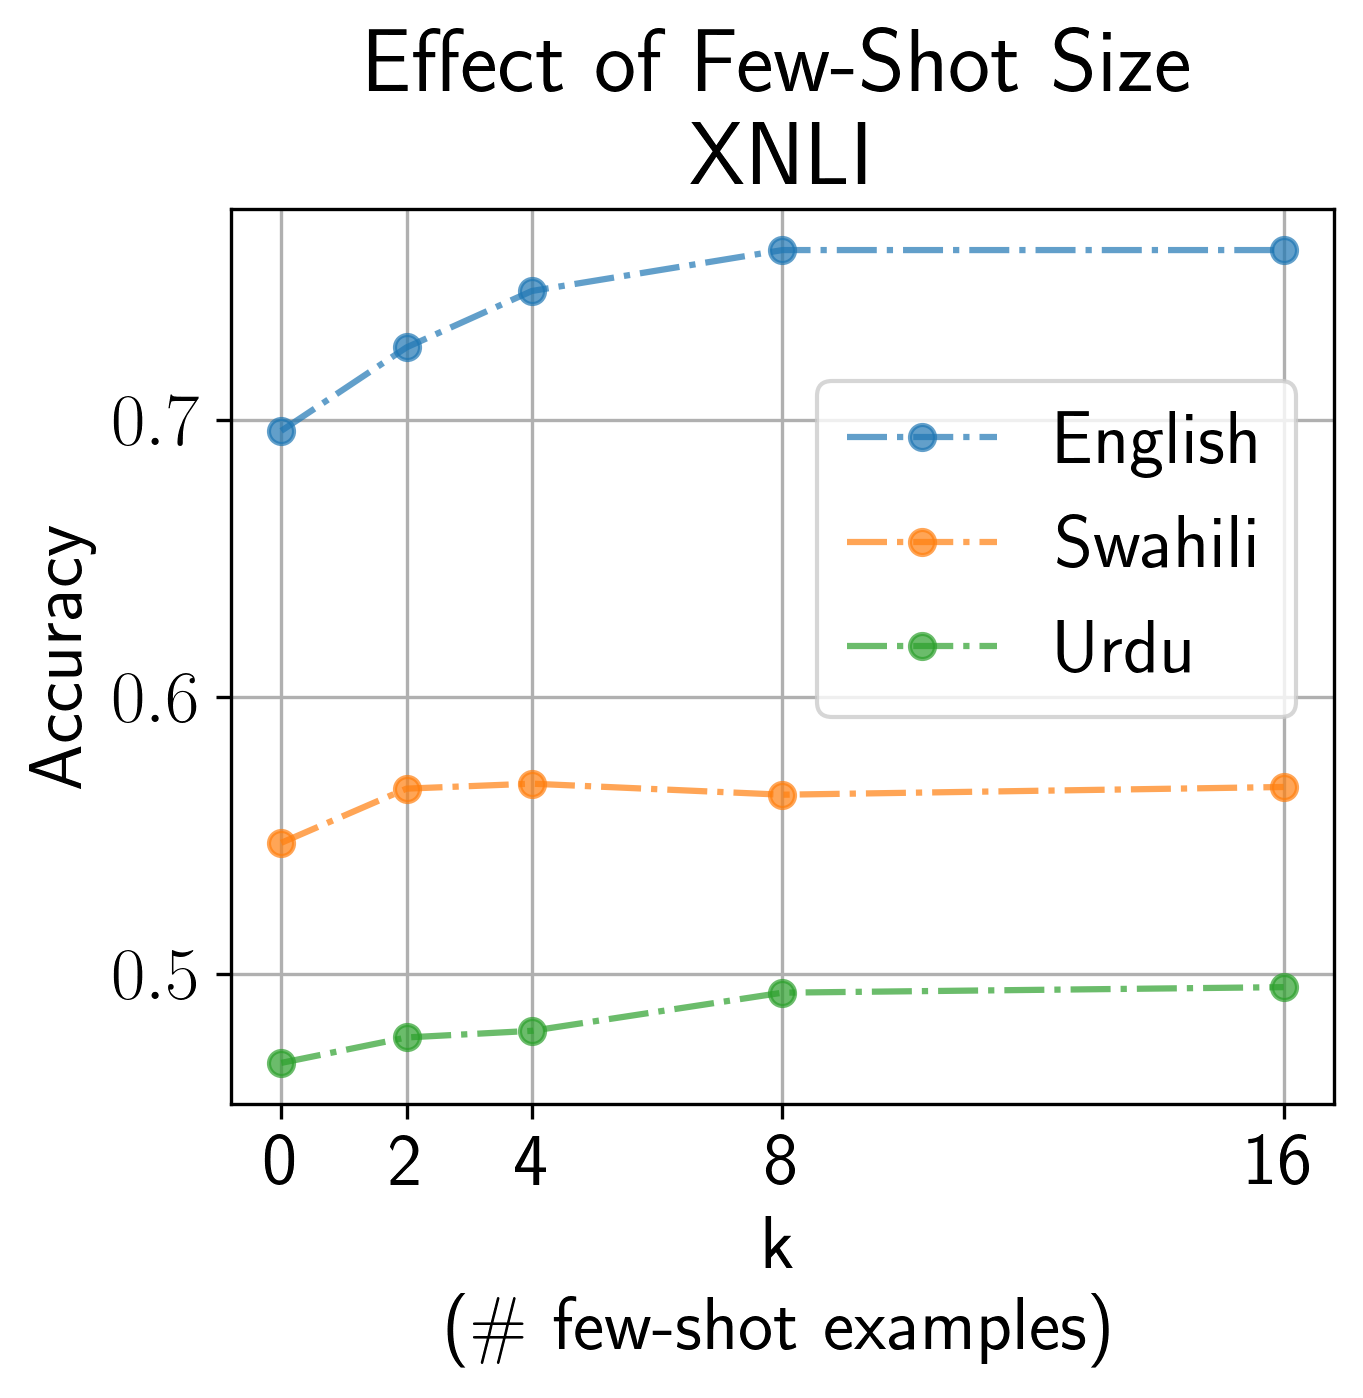

Bad pipe message: %s [b'c\xffx\x1di,\x10\x88\xe4\xb3\xf3+J\r\\\x10\xb2\xf4 \xfbo\x07r\xa7b\xd3\xca\x7f\xd0M%\x18\x87\xbe&\xb2\xf4\x1d\xbd\xd6\xb9U\xb9~J%|(\xf8\xe2\x08\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08', b'\x06\x04\x01\x05']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 T9\xfadK\xf0Y\x9d\x81\x18\xddQG\x0f3\xed\xa5\x89\x80X\x17\x80']
Bad pipe message: %s [b"T'\x07o<y\x0bos\xb2\x08\x93i+E\xcff\xb3 D\xfeM\xdaAc\xe4,=\xdaNv\x88\x89M\xa07\xf9\xeasb\xa0\xe0\xd1\x16\x86\x92A"]
Bad pipe message: %s [b"\x04TS\xf1\xe4b\xd2\xa3v\xd2%3j\xe5E\x11\xd3\x83\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\

In [25]:
# Group the dataframe by Dataset
grouped = fs_acc_df.groupby('Dataset')
alpha = 0.7

# Iterate over the unique values in the "Dataset" column
for i, (dataset, data) in enumerate(grouped):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    # Group the data by Language
    lang_grouped = data.groupby('Language')

    # Iterate over the unique values in the "Language" column
    for lang, lang_data in lang_grouped:
        ax.plot(lang_data['k'], lang_data['Accuracy'], label=lang, ls="-.",marker="o",alpha=alpha)

    ax.set_title(f"Effect of Few-Shot Size\n{dataset}")  # Set subplot title
    ax.set_xlabel('k\n(\# few-shot examples)')  # Set x-axis label
    ax.set_ylabel('Accuracy')  # Set y-axis label
    if dataset == "XCOPA":
        ax.legend(bbox_to_anchor = (0.3, 0.7))  # Show legend
    else:
        ax.legend()
        ax.legend(bbox_to_anchor = (1.0, 0.85))  # Show legend
    ax.grid(True)
    
    k_values = sorted(data['k'].unique())
    ax.set_xticks(k_values)
    ax.set_xticklabels(k_values)
    
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.savefig(f"{save_dir}/{dataset}_icl.pdf", bbox_inches = "tight")
    plt.savefig(f"{save_dir}/{dataset}_icl.png", bbox_inches = "tight", dpi=300)
    plt.show()  # Show the plot
    
    
    

In [6]:
f"../results/{dataset}/{model}/ht/*"

'../results/xcopa/gpt35-tunro/ht/*'

In [15]:
glob.glob("../results/xcopa/gpt-35-tunro/ht/*/*.csv")

['../results/xcopa/gpt-35-tunro/ht/PivotLang_ht_PromptName_plausible_alternatives_discrete_FewShotK_0/preds.csv',
 '../results/xcopa/gpt-35-tunro/ht/PivotLang_ht_PromptName_plausible_alternatives_discrete_FewShotK_16/preds.csv',
 '../results/xcopa/gpt-35-tunro/ht/PivotLang_ht_PromptName_plausible_alternatives_discrete_FewShotK_4/preds.csv',
 '../results/xcopa/gpt-35-tunro/ht/PivotLang_ht_PromptName_plausible_alternatives_discrete_FewShotK_2/preds.csv',
 '../results/xcopa/gpt-35-tunro/ht/PivotLang_ht_PromptName_plausible_alternatives_discrete_FewShotK_8/preds.csv',
 '../results/xcopa/gpt-35-tunro/ht/PivotLang_ht_PromptName_plausible_alternatives_discrete_FewShotK_1/preds.csv']

In [36]:
results

{'env': 'gpt4v3',
 'dataset': 'xcopa',
 'pivot_lang': 'ht',
 'tgt_lang': 'ht',
 'pivot_prompt_name': 'plausible_alternatives_discrete',
 'tgt_prompt_name': 'plausible_alternatives_discrete',
 'same_prompt_name': False,
 'few_shot_k': 0,
 'few_shot_selection': 'random',
 'test_frac': 1.0,
 'seed': 42,
 'model': 'gpt-35-tunro',
 'save_dir': 'results',
 'translate_test': False,
 'use_val_to_prompt': False,
 'eval_on_val': False,
 'num_evals_per_sec': 2,
 'parallel_eval': False,
 'num_proc': 4,
 'temperature': 0,
 'top_p': 1,
 'max_tokens': 20,
 'log_wandb': False,
 'no_save': False,
 'short_contexts': False,
 'xtreme_dir': 'xtreme/download',
 'copa_dir': 'data/copa/',
 'delimiter': '_',
 'verbalizer': 'identity',
 'not_one_shot_tag': False,
 'chat_prompt': True,
 'contam_lang': '',
 'contam_method': 'generate',
 'use_json_format': False,
 'timeout': 30,
 'metrics': {'accuracy': 0.006}}